In [5]:
import matplotlib.pyplot as plt

def plot_imgs(imgs):
    imgs = torchvision.utils.make_grid(imgs, nrow=5).numpy()
    plt.imshow(np.transpose(imgs, (1, 2, 0)))
    plt.axis('off')  # Turn off axis labels and ticks

In [6]:
import numpy as np
import torchvision
from src.datasets import satellite_dataloader
from src.mixing import sat_cutMix, sat_slideMix

img_dir = 'test_imgs/'
label_path = 'test_imgs/euroSAT_labels_mini.csv'

means = np.array([0.04355348, 0.0354724, 0.03290852])

dataloader = satellite_dataloader('rgb', img_dir, label_path, split='train',
                  size=64, img_ext='jpg', bands=3, task='eurosat',
                  augment=True, augment_type=['Sat-CutMix'], batch_size=5,
                  shuffle=True, num_workers=1, means=means)

# get some random training images
dataiter = iter(dataloader)
images, labels, _ = next(dataiter)

split: train
len ids: 5


Plot original images in the batch

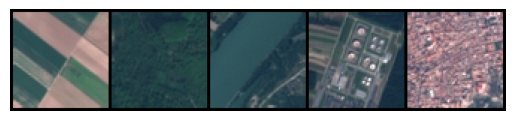

In [7]:
plot_imgs(images)

Sat-CutMix

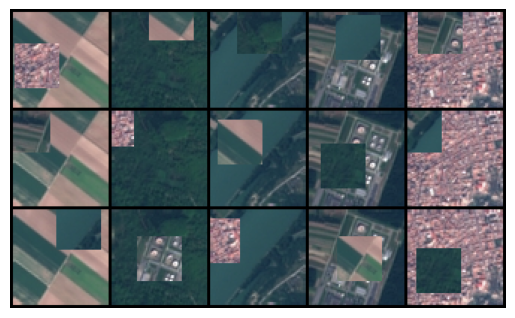

In [8]:
# define Sat-CutMix parameters
mixer1 = sat_cutMix(num_classes=10, alpha=0.90, sat_num_pairs=3, regression=False)

sat_cutMix_images, sat_cutMix_labels = mixer1(images, labels)

# plot results
plot_imgs(sat_cutMix_images)

Sat-SlideMix

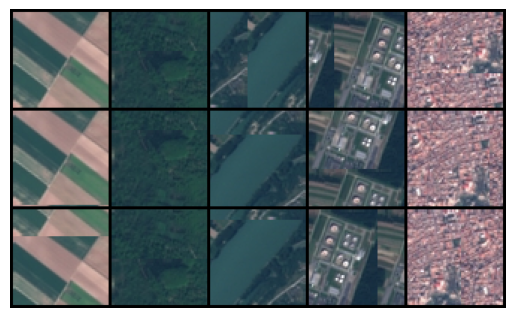

In [9]:
# define Sat-SlideMix parameters
mixer2 = sat_slideMix(num_classes=10, beta=1, sat_num_pairs=3, regression=False)

sat_slideMix_images, sat_slideMix_labels = mixer2(images, labels)

# plot results
plot_imgs(sat_slideMix_images)